In [1]:
# 쥬피터노트북 셀 스타일 조절 
from IPython.core.display import display, HTML
#display(HTML("<style>.container { font-weight: bold !important; }</style>"))
#display(HTML("<style>.container { width: 100% !important; }</style>"))

# 경고 메세지 숨기기 
import warnings
warnings.filterwarnings(action='ignore')

# Seaborn

- Matplotlib을 기반으로 다양한 색상 테마와 통계용 차트 등의 기능을 추가한 시각화 패키지
- https://seaborn.github.io/
- http://seaborn.pydata.org/

# 관련 모듈 임포트 

In [2]:
import numpy as np
import pandas as pd
import os

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# 관련 라이브러리 임포트 
import matplotlib.font_manager as fm

#  한글글꼴로 변경
# plt.rcParams['font.family'] = '한글글꼴명'
plt.rcParams['font.size'] = 11.0
# plt.rcParams['font.family'] = 'batang'
plt.rcParams['font.family'] = 'Malgun Gothic'

# 그래프에서 마이너스 폰트 깨지는 문제에 대한 대처
matplotlib.rcParams['axes.unicode_minus'] = False

# 그래프 기본 크기 설정 
plt.rcParams['figure.figsize'] = [10, 6]

In [3]:
sns.__version__

'0.11.1'

In [4]:
print(dir(sns))

['FacetGrid', 'JointGrid', 'PairGrid', '__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__path__', '__spec__', '__version__', '_core', '_decorators', '_docstrings', '_orig_rc_params', '_statistics', 'algorithms', 'axes_style', 'axisgrid', 'barplot', 'blend_palette', 'boxenplot', 'boxplot', 'categorical', 'catplot', 'choose_colorbrewer_palette', 'choose_cubehelix_palette', 'choose_dark_palette', 'choose_diverging_palette', 'choose_light_palette', 'clustermap', 'cm', 'color_palette', 'colors', 'countplot', 'crayon_palette', 'crayons', 'cubehelix_palette', 'dark_palette', 'desaturate', 'despine', 'displot', 'distplot', 'distributions', 'diverging_palette', 'dogplot', 'ecdfplot', 'external', 'factorplot', 'get_data_home', 'get_dataset_names', 'heatmap', 'histplot', 'hls_palette', 'husl_palette', 'jointplot', 'kdeplot', 'light_palette', 'lineplot', 'lmplot', 'load_dataset', 'matrix', 'miscplot', 'mpl', 'mpl_palette', 'pairplot', 'palettes', 'pal

# sns.load_dataset?
https://github.com/mwaskom/seaborn-data

# seaborn 라이브러리의 tips 데이타셋 로딩

- 데이타프레임변수 = sns.load_dataset('tips')
- 레스토랑의 팁을 지불한 손님의 정보를 모아둔것 
- 지불금액, 팁, 성별, 흡연유무, 요일, 시간, 전체인원 으로 컬럼 구성

In [5]:
#seaborn 라이브러리에서 제공하는 데이터셋 목록 확인
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'exercise',
 'flights',
 'fmri',
 'gammas',
 'geyser',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'taxis',
 'tips',
 'titanic']

In [6]:
tips = sns.load_dataset("tips")
tips.shape

(244, 7)

In [7]:
tips.head(3)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3


In [8]:
tips.dtypes

total_bill     float64
tip            float64
sex           category
smoker        category
day           category
time          category
size             int64
dtype: object

In [9]:
tips['sex'].unique(), tips['smoker'].unique(), tips['day'].unique(), tips['time'].unique()

(['Female', 'Male']
 Categories (2, object): ['Female', 'Male'],
 ['No', 'Yes']
 Categories (2, object): ['No', 'Yes'],
 ['Sun', 'Sat', 'Thur', 'Fri']
 Categories (4, object): ['Sun', 'Sat', 'Thur', 'Fri'],
 ['Dinner', 'Lunch']
 Categories (2, object): ['Dinner', 'Lunch'])

In [10]:
tips.isnull().sum()

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64

# sns.histplot()

- sns.그래프명(x='컬럼명1', y='컬럼명2', data=데이터프레임, 옵션)

In [11]:
tips['tip']

0      1.01
1      1.66
2      3.50
3      3.31
4      3.61
       ... 
239    5.92
240    2.00
241    2.00
242    1.75
243    3.00
Name: tip, Length: 244, dtype: float64

<AxesSubplot:xlabel='tip', ylabel='Count'>

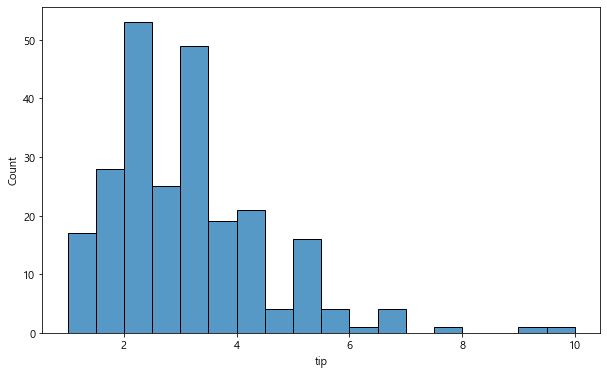

In [12]:
sns.histplot(x='tip', data=tips)
#sns.histplot(tips['tip']);

In [13]:
sns.histplot?

<AxesSubplot:xlabel='total_bill', ylabel='Count'>

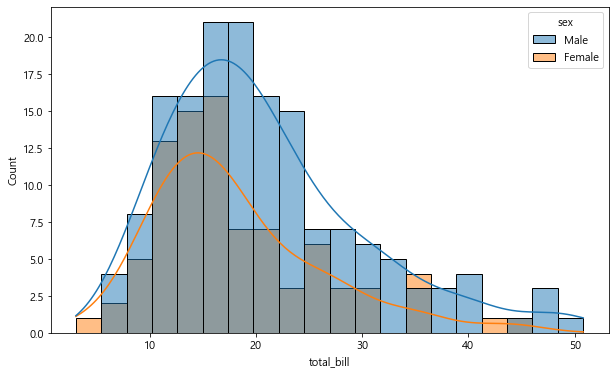

In [14]:
#hue 값은 카테고리형 컬럼명
sns.histplot(x='total_bill', data=tips, bins=20, hue='sex', kde=True)

<AxesSubplot:xlabel='tip', ylabel='Count'>

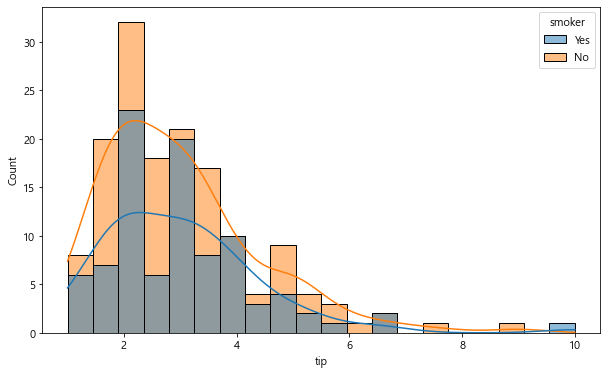

In [15]:
sns.histplot(x='tip', data=tips, bins=20, hue='smoker', kde=True)

<AxesSubplot:xlabel='tip', ylabel='Count'>

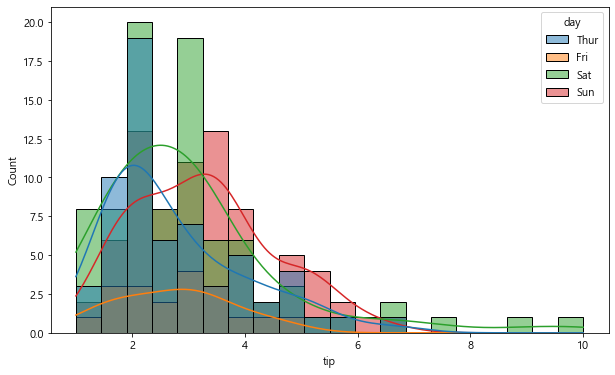

In [16]:
sns.histplot(x='tip', data=tips, bins=20, hue='day', kde=True)

<AxesSubplot:xlabel='tip', ylabel='Count'>

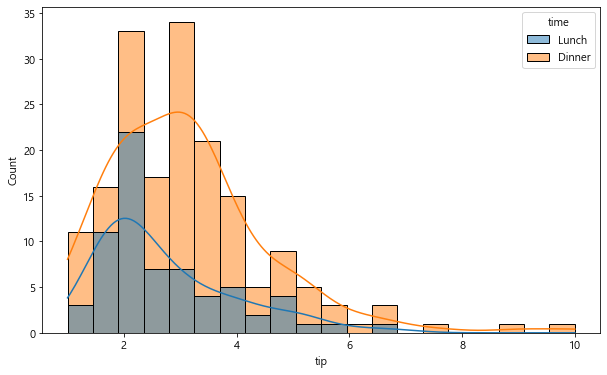

In [17]:
sns.histplot(x='tip', data=tips, bins=20, hue='time', kde=True)

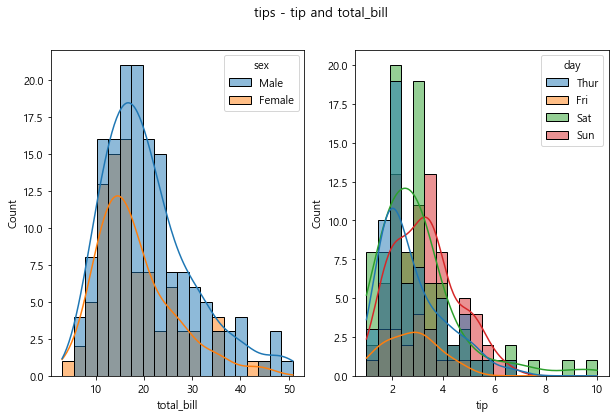

In [18]:
#서브플랏 스타일로 히스토그램 그래프 배치
#1행 2열로 배치

fig1 = plt.figure()
plt.subplot(121)
sns.histplot(x='total_bill',data=tips, bins=20, hue='sex', kde=True);

plt.subplot(122)
sns.histplot(x='tip',data=tips, bins=20, hue='day', kde=True);

plt.suptitle('tips - tip and total_bill')
plt.show()

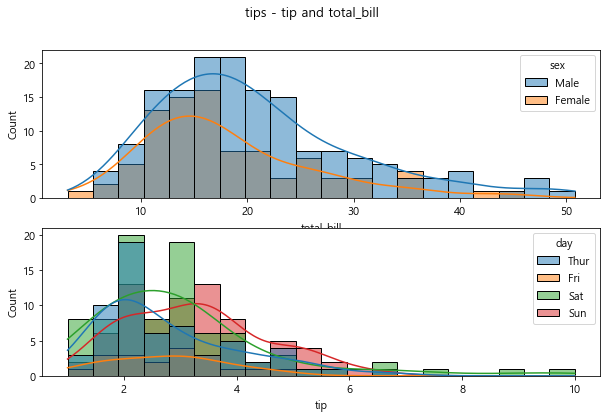

In [19]:
#서브플랏 스타일로 히스토그램 그래프 배치
#2행 1열로 배치

fig2 = plt.figure()
plt.subplot(211)
sns.histplot(x='total_bill',data=tips, bins=20, hue='sex', kde=True);

plt.subplot(212)
sns.histplot(x='tip',data=tips, bins=20, hue='day', kde=True);

plt.suptitle('tips - tip and total_bill')

plt.savefig('output/tip_and_total_bill.png')

plt.show()

In [20]:
tips.columns

Index(['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size'], dtype='object')

In [21]:
tips.columns

Index(['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size'], dtype='object')

In [22]:
tips.columns

Index(['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size'], dtype='object')

In [23]:
tips.columns

Index(['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size'], dtype='object')

In [24]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


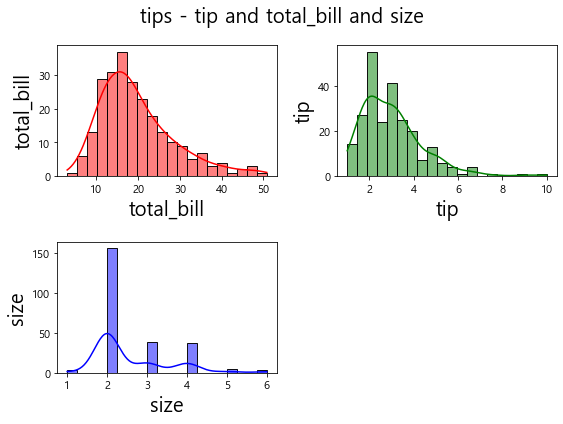

In [25]:
fig1 = plt.figure(figsize=(8, 6))

columns_list = ['total_bill', 'tip', 'size']
color_list = ['red', 'green', 'blue']

for i in range(3):
#     print(i)
    plt.subplot(221 + i)
    #sns.histplot(tips[columns_list[i]], bins=10, color=color_list[i])
    sns.histplot(x=columns_list[i],data=tips, bins=20, kde=True, color=color_list[i]);
    #x, y축 글자 사이즈 조정
    plt.xlabel(columns_list[i], size=20)
    plt.ylabel(columns_list[i], size=20)
    
plt.suptitle('tips - tip and total_bill and size', fontsize=20)    
plt.tight_layout(pad=1.2, w_pad=1.5, h_pad=2.0)

plt.savefig('output/tip_and_total_bill_and_size.png')

plt.show()

- axes.labelsize : x 및 y 레이블의 글꼴 크기
- axes.titlesize : 축 제목의 글꼴 크기
- figure.titlesize : 그림 제목의 크기(figure.suptitle())
- xtick.labelsize/ ytick.labelsize : 눈금 레이블의 글꼴 크기
- legend.fontsize : 범례의 글꼴 크기(plt.legend(), fig.legend())
- legend.title_fontsize : 범례 제목의 글꼴 크기, 없음은 기본 축과 동일하게 설정됨

## plt.hist() , tips['total_bill'].plot(kind='hist' ), sns.histplot()

(array([ 1.,  6., 13., 29., 31., 37., 28., 23., 18., 13., 10.,  9.,  5.,
         7.,  3.,  4.,  1.,  2.,  3.,  1.]),
 array([ 3.07 ,  5.457,  7.844, 10.231, 12.618, 15.005, 17.392, 19.779,
        22.166, 24.553, 26.94 , 29.327, 31.714, 34.101, 36.488, 38.875,
        41.262, 43.649, 46.036, 48.423, 50.81 ]),
 <BarContainer object of 20 artists>)

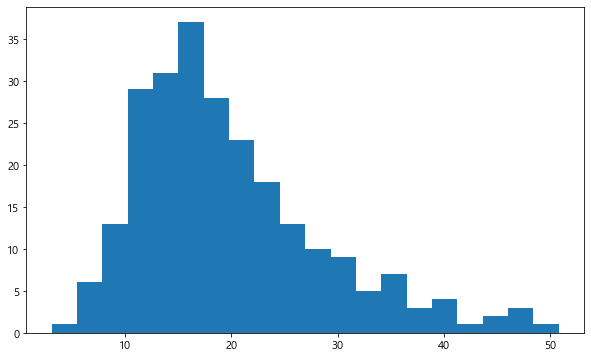

In [27]:
plt.hist(tips['total_bill'], bins=20)

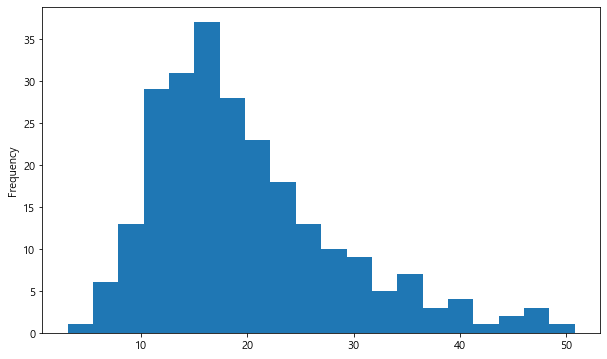

In [28]:
tips['total_bill'].plot(kind='hist', bins=20 );

<AxesSubplot:xlabel='total_bill', ylabel='Count'>

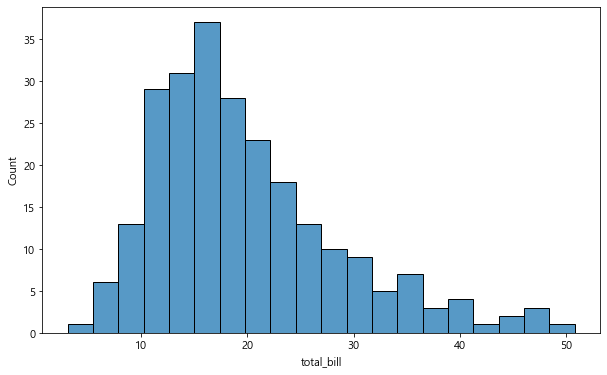

In [29]:
sns.histplot(tips['total_bill'], bins=20)

# lineplot()

- sns.lineplot(x=컬럼명1, y=컬럼명2, data=데이터프레임명, 옵션=값)

Text(0.5, 1.0, 'Sin')

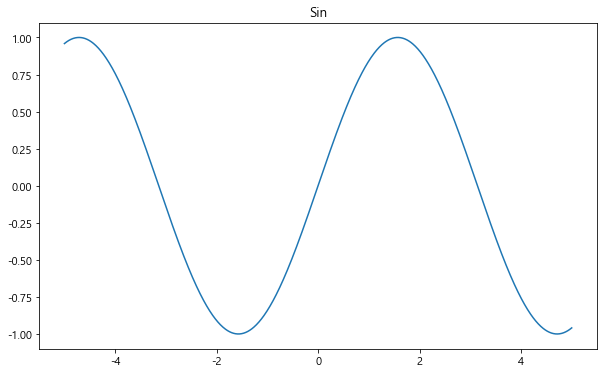

In [30]:
#넘파이 데이터를 이용해서 그래프 출력
xData = np.linspace(-5, 5, 1000)
yData = np.sin(xData)
sns.lineplot(x=xData, y=yData);
plt.title('Sin')

<AxesSubplot:xlabel='tip', ylabel='total_bill'>

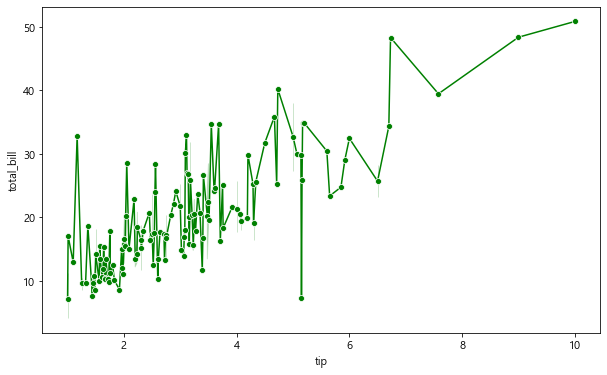

In [31]:
sns.lineplot(x='tip', y='total_bill', data=tips, marker='o', color='g')

In [32]:
sns.lineplot?

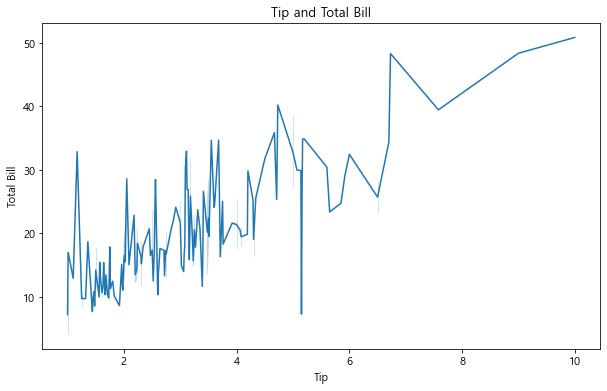

In [33]:
#ax 변수 설정 방식
ax = sns.lineplot(x='tip', y='total_bill', data=tips)
ax.set_title('Tip and Total Bill')
ax.set_xlabel('Tip')
ax.set_ylabel('Total Bill')
plt.show()

In [34]:
ax

<AxesSubplot:title={'center':'Tip and Total Bill'}, xlabel='Tip', ylabel='Total Bill'>

# countplot()

- sns.countplot(컬럼명, data=데이터프레임, 옵션=값)
- 범주형 데이터에서 사용

In [35]:
tips['day'].unique()

['Sun', 'Sat', 'Thur', 'Fri']
Categories (4, object): ['Sun', 'Sat', 'Thur', 'Fri']

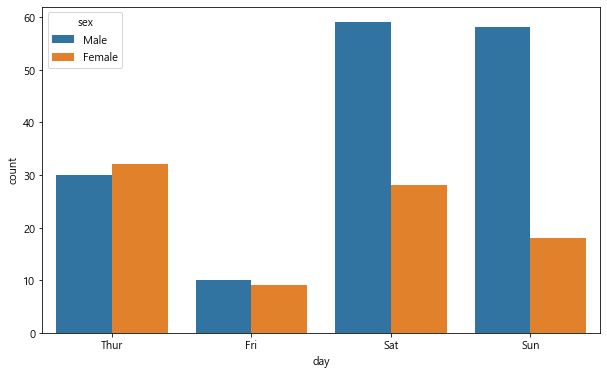

In [36]:
sns.countplot('day', data=tips, hue='sex');

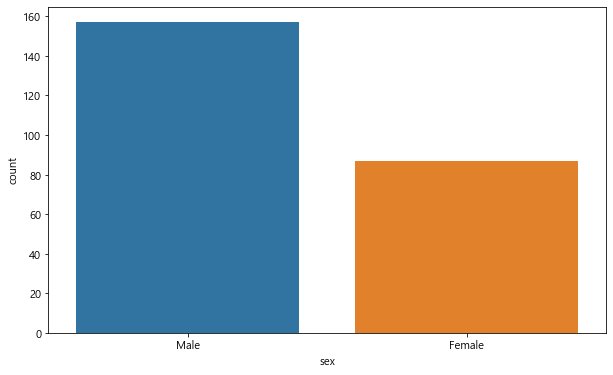

In [37]:
sns.countplot('sex', data=tips);

Text(0, 0.5, 'Frequency')

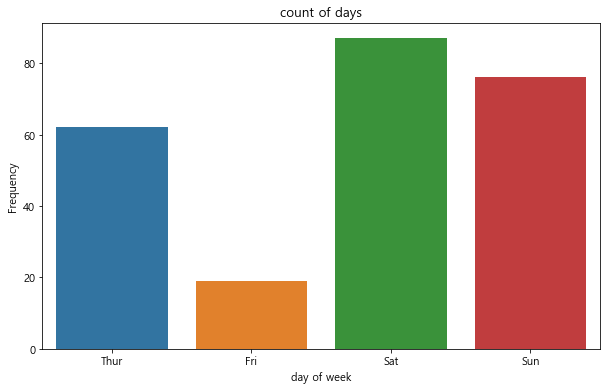

In [38]:
ax = plt.subplots()
ax = sns.countplot('day', data=tips)
ax.set_title('count of days')
ax.set_xlabel('day of week')
ax.set_ylabel('Frequency')

# sns.regplot()
- 회귀 + 산점도
- sns.regplot[log(x=컬럼명, y=컬럼명2, data=데이터프레임, fit_reg=True)

In [39]:
#빙어의 길이와 무게 리스트
smelt_length = [9.8, 10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
smelt_weight = [6.7, 7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

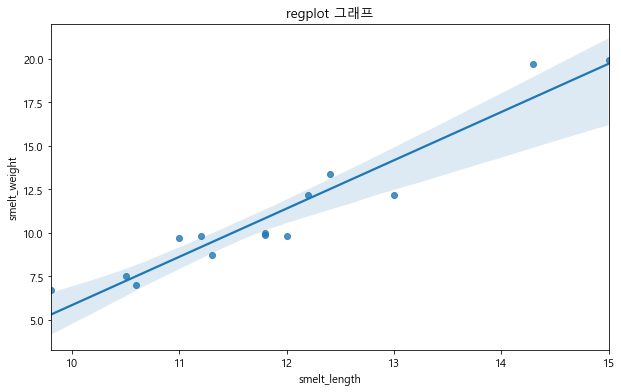

In [40]:
fig, ax = plt.subplots()

ax = sns.regplot(x=smelt_length, y=smelt_weight, fit_reg=True)

ax.set_title('regplot 그래프')
ax.set_xlabel('smelt_length')
ax.set_ylabel('smelt_weight')

ax;

# joinplot 을 이용한 산점도+히스토그램

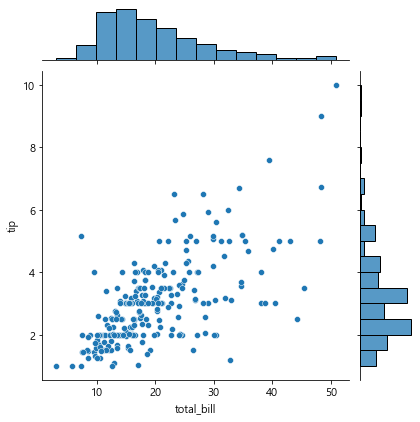

In [41]:
sns.jointplot(x='total_bill', y='tip', data=tips)

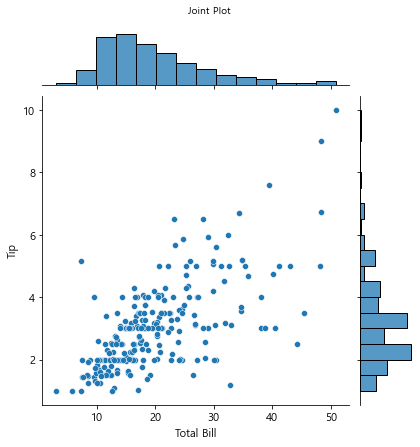

In [42]:
# ax = plt.subplots()
ax = sns.jointplot(x='total_bill', y='tip', data=tips)
ax.fig.suptitle('Joint Plot', fontsize=10, y=1.03)
ax.set_axis_labels(xlabel='Total Bill', ylabel='Tip')
ax

In [1]:
sns.joinplot(x='total _bill', y='tip', data=tips, kind='sex')

NameError: name 'sns' is not defined

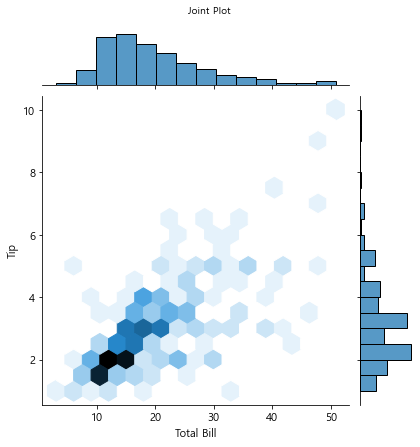

In [44]:
ax = sns.jointplot(x='total_bill', y='tip', data=tips, kind='hex')
ax.fig.suptitle('Joint Plot', fontsize=10, y=1.03)
ax.set_axis_labels(xlabel='Total Bill', ylabel='Tip')
ax

### 바이올린 그래프 (violinplot)

sns.violinplot(x=컬럼명1, y=컬럼명2, data=데이터프레임)

x축은 범주형 데이터컬럼
y축은 수치형 데이터컬럼

<AxesSubplot:xlabel='time', ylabel='total_bill'>

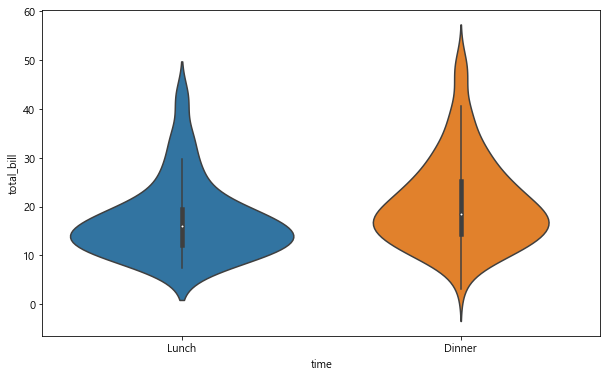

In [45]:
sns.violinplot(x='time', y='total_bill', data=tips)

<AxesSubplot:xlabel='sex', ylabel='total_bill'>

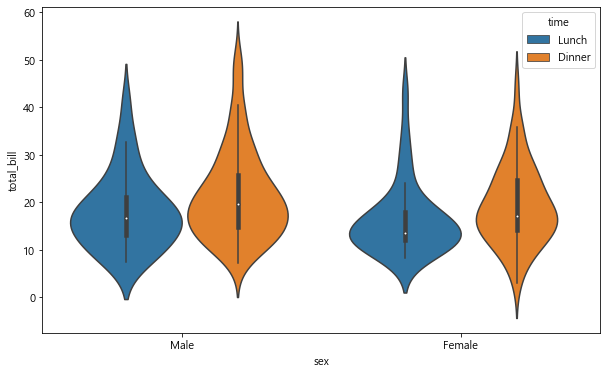

In [46]:
sns.violinplot(x='sex', y='total_bill', data=tips, hue='time')

<AxesSubplot:title={'center':'violin Plot of total bill for time of day'}, xlabel='Time of day', ylabel='Total bill'>

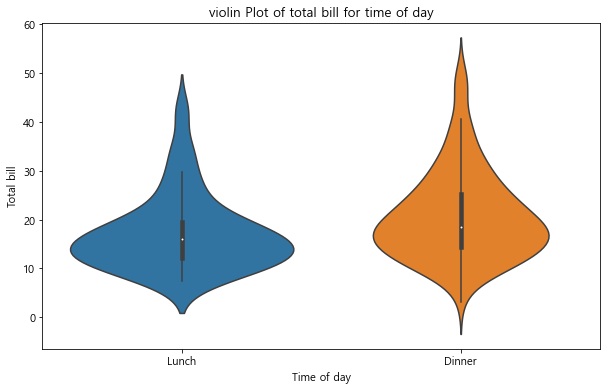

In [47]:
ax = plt.subplots()
ax = sns.violinplot(x='time', y='total_bill', data=tips)
ax.set_title('violin Plot of total bill for time of day')
ax.set_xlabel('Time of day')
ax.set_ylabel('Total bill')
ax

<AxesSubplot:title={'center':'violin Plot of total bill for time of day'}, xlabel='Time', ylabel='Total bill'>

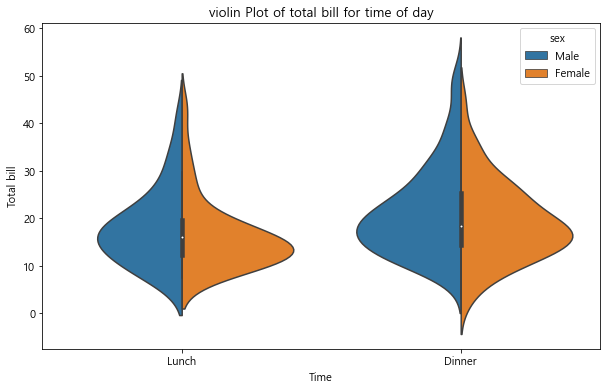

In [48]:
ax = plt.subplots()
ax = sns.violinplot(x='time', y='total_bill', hue='sex', data=tips, split=True)
ax.set_title('violin Plot of total bill for time of day')
ax.set_xlabel('Time')
ax.set_ylabel('Total bill')
ax

## Barplot()

sns.barplot(x=컬럼명1, y=컬럼명2, data=데이터프레임)

In [49]:
tips[['time','total_bill']].head()

,time,total_bill
0,Dinner,16.99
1,Dinner,10.34
2,Dinner,21.01
3,Dinner,23.68
4,Dinner,24.59


<AxesSubplot:xlabel='time', ylabel='total_bill'>

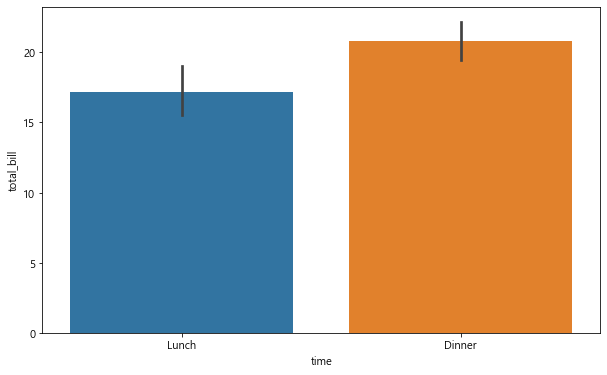

In [50]:
sns.barplot(x='time', y='total_bill', data=tips)
#가운데 검은 선 : 실제 데이터의 평균 분포

<AxesSubplot:xlabel='time', ylabel='total_bill'>

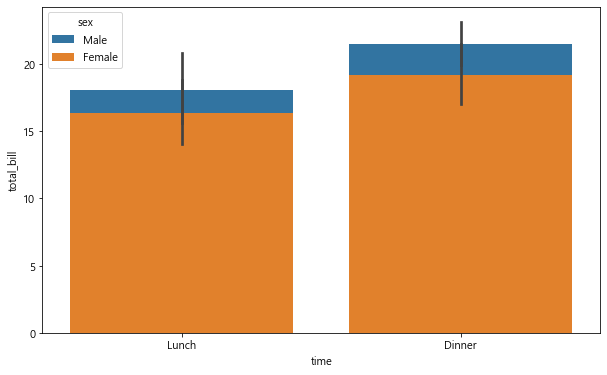

In [55]:
#dodge=False : 각각의 막대그래프가 겹쳐서 보이는 형태
sns.barplot(x='time', y='total_bill', data=tips, hue='sex', dodge=False)

<AxesSubplot:xlabel='day', ylabel='tip'>

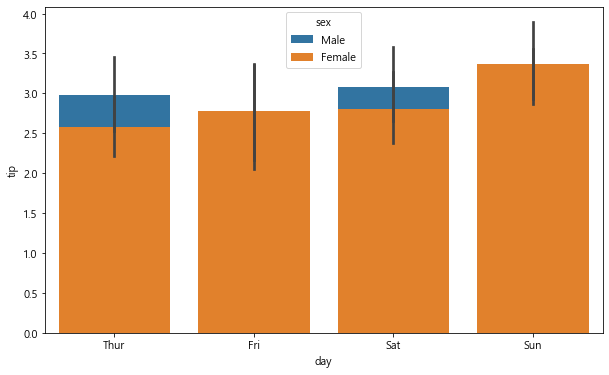

In [58]:
sns.barplot(y='tip', x='day', data=tips, hue='sex', dodge=False)

<AxesSubplot:xlabel='total_bill', ylabel='time'>

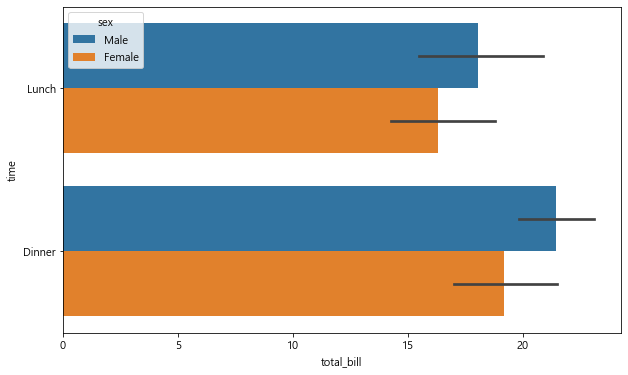

In [53]:
#x축이 수치형, y축이 범주형
sns.barplot( y='time',x='total_bill', data=tips, hue='sex')

In [ ]:
ax = plt.subplots()
ax = sns.barplot(x='tip', y='day', data=tips, capsize=.2)
ax.set_title('Bar plot of Day and Tip') # 제목지정
ax.set_xlabel('Total Bill') # X축 제목
ax.set_ylabel('tip') # Y축 제목

# Boxplot 그래프

```
최솟값, 1분위수, 중간값, 3분위수, 최댓값, 이상치를 표시 

ax = sns.boxplot(x=컬럼명1', y='컬럼명2, data=데이터프레임)
```

In [59]:
tips[['time', 'total_bill']].tail()

,time,total_bill
239,Dinner,29.03
240,Dinner,27.18
241,Dinner,22.67
242,Dinner,17.82
243,Dinner,18.78


<AxesSubplot:xlabel='total_bill', ylabel='time'>

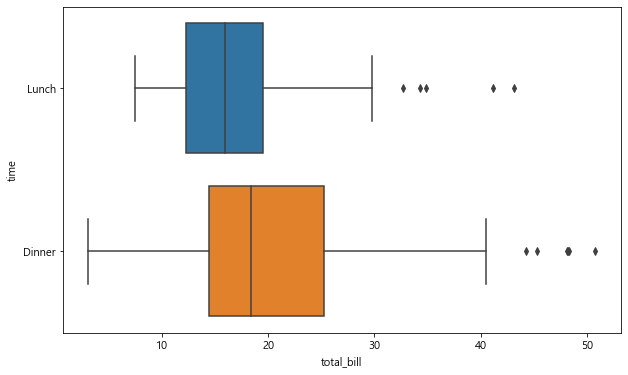

In [61]:
sns.boxplot(x = 'total_bill', y = 'time', data=tips)

<AxesSubplot:xlabel='smoker', ylabel='tip'>

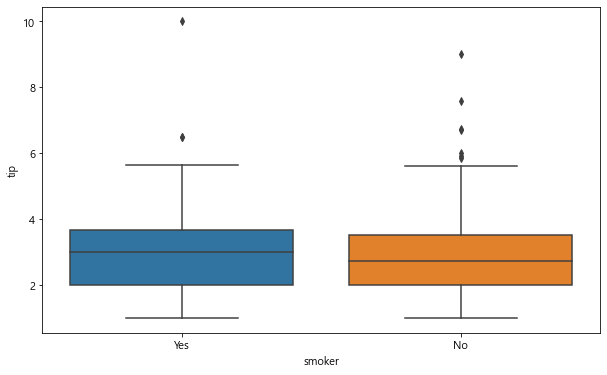

In [62]:
sns.boxplot(x = 'smoker', y = 'tip', data=tips)

<AxesSubplot:xlabel='tip', ylabel='total_bill'>

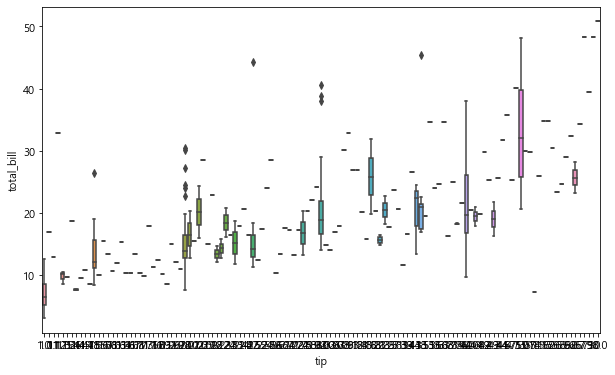

In [63]:
sns.boxplot(x = 'tip', y = 'total_bill', data=tips)

In [64]:
tips['tip'].unique()

array([ 1.01,  1.66,  3.5 ,  3.31,  3.61,  4.71,  2.  ,  3.12,  1.96,
        3.23,  1.71,  5.  ,  1.57,  3.  ,  3.02,  3.92,  1.67,  3.71,
        3.35,  4.08,  2.75,  2.23,  7.58,  3.18,  2.34,  4.3 ,  1.45,
        2.5 ,  2.45,  3.27,  3.6 ,  3.07,  2.31,  2.24,  2.54,  3.06,
        1.32,  5.6 ,  6.  ,  2.05,  2.6 ,  5.2 ,  1.56,  4.34,  3.51,
        1.5 ,  1.76,  6.73,  3.21,  1.98,  3.76,  2.64,  3.15,  2.47,
        1.  ,  2.01,  2.09,  1.97,  3.14,  2.2 ,  1.25,  3.08,  4.  ,
        2.71,  3.4 ,  1.83,  2.03,  5.17,  5.85,  3.25,  4.73,  3.48,
        1.64,  4.06,  4.29,  2.55,  5.07,  1.8 ,  2.92,  1.68,  2.52,
        4.2 ,  1.48,  2.18,  2.83,  6.7 ,  2.3 ,  1.36,  1.63,  1.73,
        2.74,  5.14,  3.75,  2.61,  4.5 ,  1.61, 10.  ,  3.16,  5.15,
        3.11,  3.55,  3.68,  5.65,  6.5 ,  4.19,  2.56,  2.02,  1.44,
        3.41,  5.16,  9.  ,  1.1 ,  3.09,  1.92,  1.58,  2.72,  2.88,
        3.39,  1.47,  1.17,  4.67,  5.92,  1.75])

Text(0, 0.5, 'total_bill')

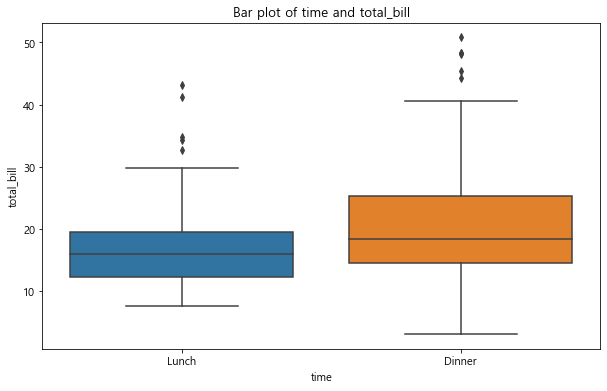

In [60]:
ax = plt.subplots()
ax = sns.boxplot(x='time', y='total_bill', data=tips)
ax.set_title('Bar plot of time and total_bill') # 제목지정
ax.set_xlabel('time') # X축 제목
ax.set_ylabel('total_bill') # Y축 제목

# 관계 그래프 (PairGrid)

- 그래프 형태가 같다

그래프변수 = sns.PairGrid(데이터프레임)

그래프변수.map(sns.그래프종류)

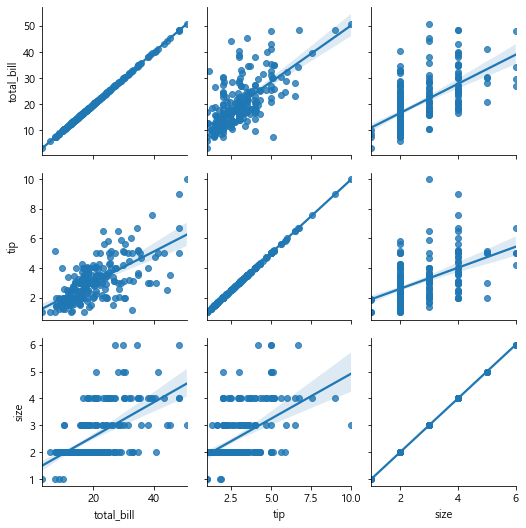

In [65]:
#그래프 형태가 같음
pair_grid = sns.PairGrid(tips)
pair_grid.map(sns.regplot)
plt.show()

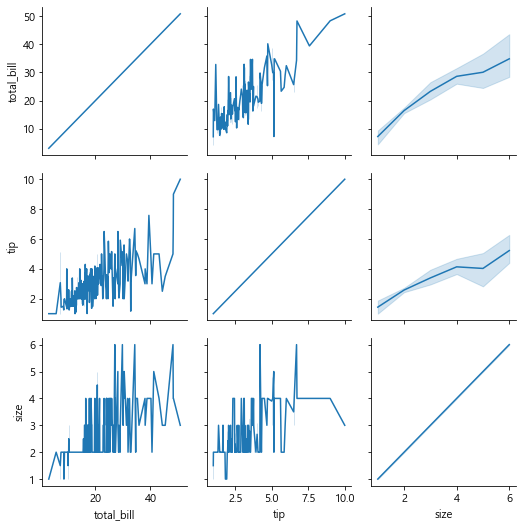

In [67]:
#그래프 형태가 같음
pair_grid = sns.PairGrid(tips)
pair_grid.map(sns.lineplot)
plt.show()

- 그래프변수 = sns.PairGrid(데이터프레임명)
- 그래프변수.map_diag(그래프1, 옵션=값) #대각선그래프
- 그래프변수.map_offdiag(그래프2, 옵션=값) #대각선 이외의 그래프

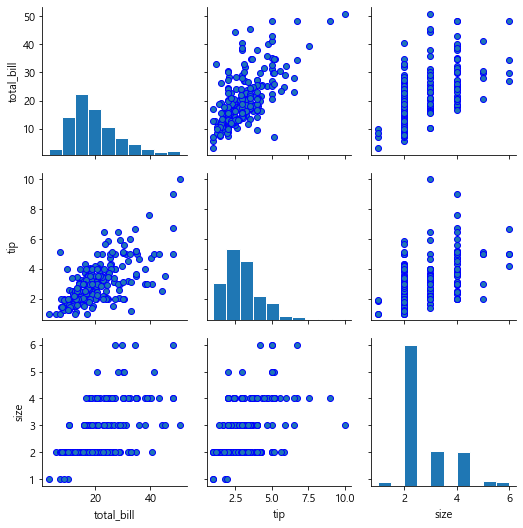

In [66]:
#그래프 형태가 다름
pair_grid = sns.PairGrid(tips)
pair_grid = pair_grid.map_diag(plt.hist, edgecolor="w")
pair_grid = pair_grid.map_offdiag(plt.scatter, edgecolor="b")
plt.show()

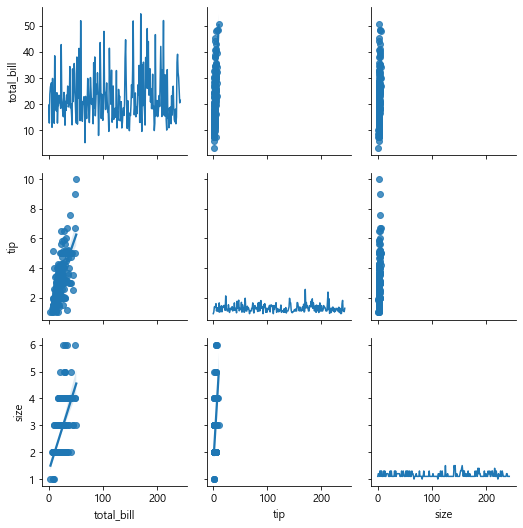

In [71]:
pair_grid = sns.PairGrid(tips)
pair_grid = pair_grid.map_diag(plt.plot)
pair_grid = pair_grid.map_offdiag(sns.regplot)
plt.show()

# pairplot


```
pairplot은 데이터프레임을 인수로 받아 그리드(grid) 형태로 각 데이터 열의 조합에 대해 스캐터 플롯을 그린다.

pairplot: http://seaborn.pydata.org/generated/seaborn.pairplot.html

```

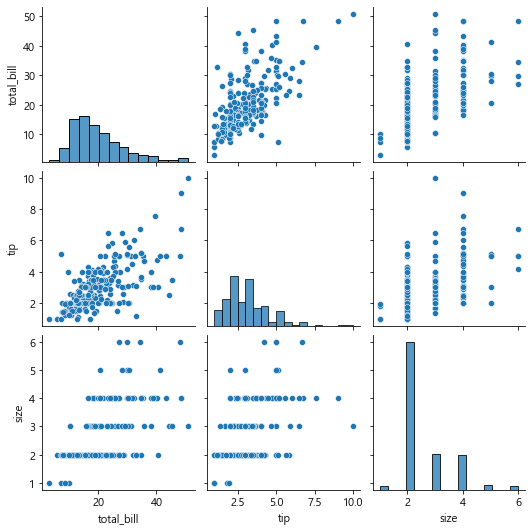

In [73]:
sns.pairplot(tips)

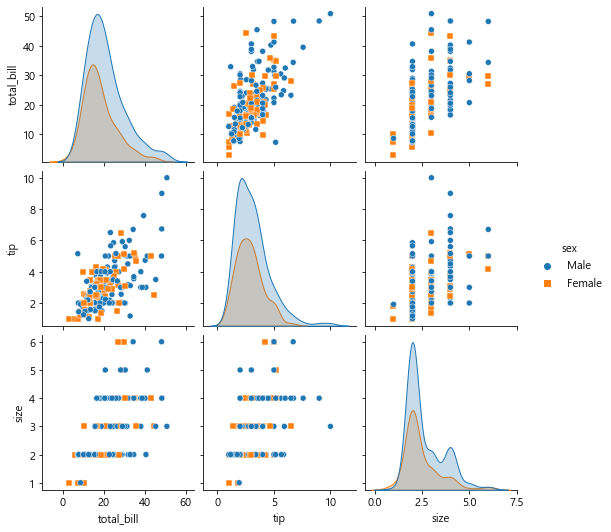

In [74]:
#hue 값을 지정하면 대각선은 밀집선
sns.pairplot(tips, hue="sex", markers=["o", "s"])
plt.show()

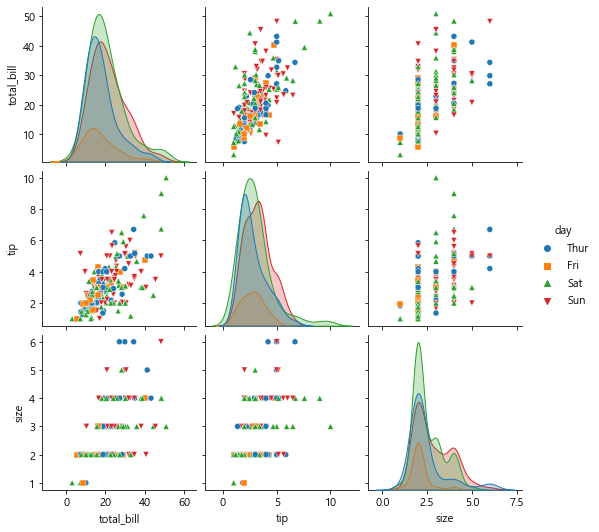

In [79]:
sns.pairplot(tips, hue="day", markers=["o", "s", "^", "v"])
plt.show()

# 다른 데이타셋 이용하기 

In [ ]:
iris = sns.load_dataset("iris")    # 붓꽃 데이터
titanic = sns.load_dataset("titanic")    # 타이타닉호 데이터
# tips = sns.load_dataset("tips")    # 팁 데이터
flights = sns.load_dataset("flights")    # 여객운송 데이터

In [80]:
titanic = sns.load_dataset("titanic") 
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [81]:
titanic.dtypes

survived          int64
pclass            int64
sex              object
age             float64
sibsp             int64
parch             int64
fare            float64
embarked         object
class          category
who              object
adult_male         bool
deck           category
embark_town      object
alive            object
alone              bool
dtype: object

In [82]:
titanic['survived'].value_counts()

0    549
1    342
Name: survived, dtype: int64

In [83]:
titanic['sex'].value_counts()

male      577
female    314
Name: sex, dtype: int64

In [84]:
titanic['embarked'].value_counts()

S    644
C    168
Q     77
Name: embarked, dtype: int64

In [85]:
titanic['deck'].value_counts()

C    59
B    47
D    33
E    32
A    15
F    13
G     4
Name: deck, dtype: int64

In [86]:
titanic['who'].unique()

array(['man', 'woman', 'child'], dtype=object)

In [87]:
titanic.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [88]:
titanic[titanic.isnull()['embark_town']]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
61,1,1,female,38.0,0,0,80.0,NaN,First,woman,False,B,NaN,yes,True
829,1,1,female,62.0,0,0,80.0,NaN,First,woman,False,B,NaN,yes,True


In [89]:
titanic['embark_town'].unique()

array(['Southampton', 'Cherbourg', 'Queenstown', nan], dtype=object)

In [90]:
titanic['embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

# 카운트플랏


In [91]:
titanic.shape

(891, 15)

In [92]:
titanic['class'].value_counts()

Third     491
First     216
Second    184
Name: class, dtype: int64

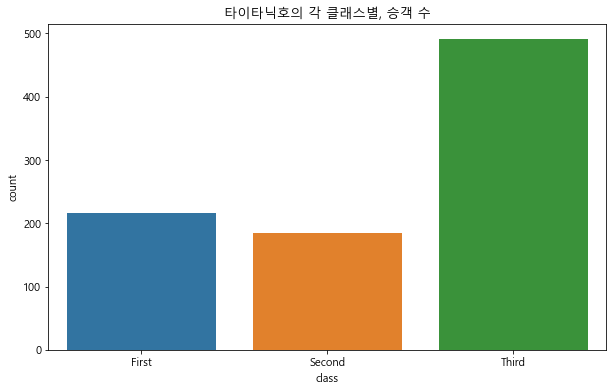

In [93]:
sns.countplot(x="class", data=titanic)
plt.title("타이타닉호의 각 클래스별, 승객 수")
plt.show()

<AxesSubplot:xlabel='who', ylabel='count'>

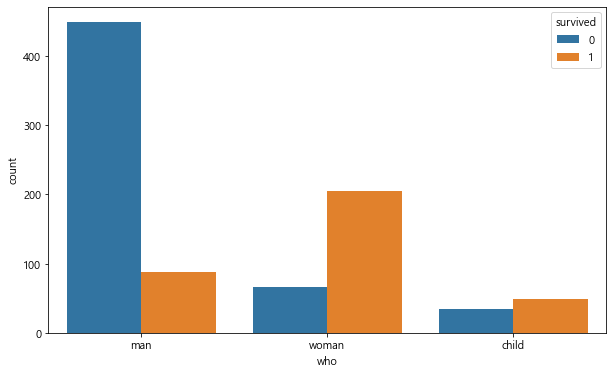

In [98]:
#남자/여자/아동별 생존/사망
sns.countplot(x="who", data=titanic, hue='survived')

In [ ]:
sns.countplot(x="sex", data=titanic)
plt.title("타이타닉호의 각 클래스별, 승객 수")
plt.show()

## 히트맵(Heat Map)

- X축과 Y축에 2개의 범주형 자료값에 비례하여 색깔을 다르게 해서 2차원으로 자료를 시각화하는데 사용한다.
- sns.heatmap(data, op)

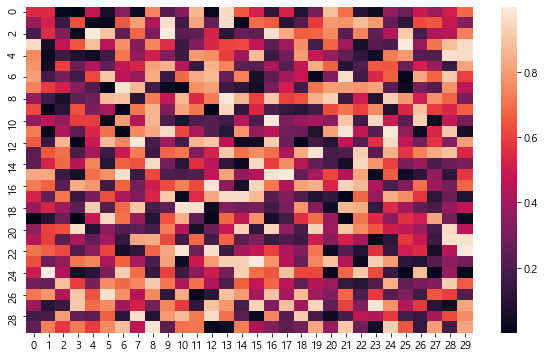

In [99]:
data = np.random.rand(30,30)
data
sns.heatmap(data);

In [100]:
titanic2 = titanic[['age', 'survived', 'fare']]
titanic2

,age,survived,fare
0,22.0,0,7.2500
1,38.0,1,71.2833
2,26.0,1,7.9250
3,35.0,1,53.1000
4,35.0,0,8.0500
...,...,...,...
886,27.0,0,13.0000
887,19.0,1,30.0000
888,NaN,0,23.4500
889,26.0,1,30.0000


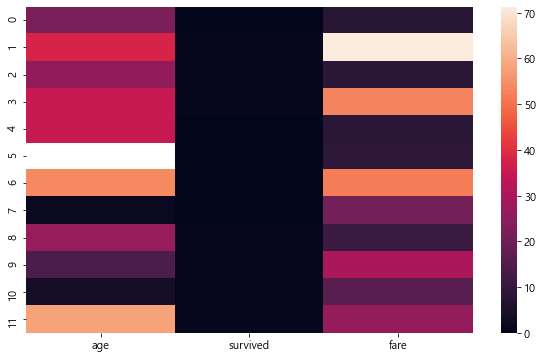

In [101]:
sns.heatmap(titanic2[:12]);

### flights 데이타셋 로딩

연도(year)별 월(month)별 승객 수(passengers)

데이타프레임변수 = sns.load_dataset('flights')

In [102]:
flights = sns.load_dataset('flights')
flights.head()

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


In [103]:
flights.isnull().sum()

year          0
month         0
passengers    0
dtype: int64

In [104]:
flights['year'].unique()

array([1949, 1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959,
       1960], dtype=int64)

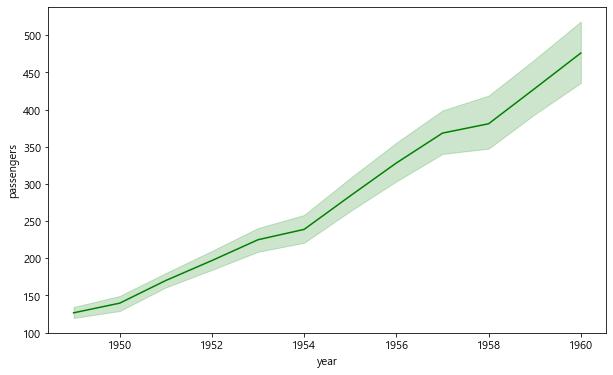

In [105]:
# year와 passengers 컬럼을 이용한 그래프 
sns.lineplot(x='year', y='passengers', data=flights, color='green');

데이터프레임명.pivot(인덱스컬럼, 컬럼인덱스컬럼, 값컬럼)

In [106]:
flights_pv = flights.pivot('month', 'year', 'passengers')
flights_pv

year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
Jan,112,115,145,171,196,204,242,284,315,340,360,417
Feb,118,126,150,180,196,188,233,277,301,318,342,391
Mar,132,141,178,193,236,235,267,317,356,362,406,419
Apr,129,135,163,181,235,227,269,313,348,348,396,461
May,121,125,172,183,229,234,270,318,355,363,420,472
Jun,135,149,178,218,243,264,315,374,422,435,472,535
Jul,148,170,199,230,264,302,364,413,465,491,548,622
Aug,148,170,199,242,272,293,347,405,467,505,559,606
Sep,136,158,184,209,237,259,312,355,404,404,463,508


In [107]:
flights_pv.corr()

year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
year,,,,,,,,,,,,
1949,1.000000,0.949435,0.944994,0.905623,0.970144,0.911553,0.908190,0.940419,0.933350,0.912513,0.901456,0.887272
1950,0.949435,1.000000,0.946923,0.957062,0.880477,0.930967,0.949866,0.938707,0.934320,0.904400,0.927191,0.887417
1951,0.944994,0.946923,1.000000,0.923131,0.939609,0.959165,0.939515,0.946961,0.946232,0.911054,0.947280,0.894268
1952,0.905623,0.957062,0.923131,1.000000,0.861005,0.942879,0.956044,0.960854,0.963146,0.960107,0.962860,0.925008
1953,0.970144,0.880477,0.939609,0.861005,1.000000,0.913945,0.884986,0.929524,0.928578,0.907120,0.902622,0.894288
1954,0.911553,0.930967,0.959165,0.942879,0.913945,1.000000,0.989433,0.984947,0.986983,0.962541,0.988882,0.965944
1955,0.908190,0.949866,0.939515,0.956044,0.884986,0.989433,1.000000,0.985527,0.982708,0.961328,0.984109,0.974451
1956,0.940419,0.938707,0.946961,0.960854,0.929524,0.984947,0.985527,1.000000,0.997125,0.983194,0.983704,0.977851
1957,0.933350,0.934320,0.946232,0.963146,0.928578,0.986983,0.982708,0.997125,1.000000,0.986762,0.988408,0.977076


<AxesSubplot:xlabel='year', ylabel='month'>

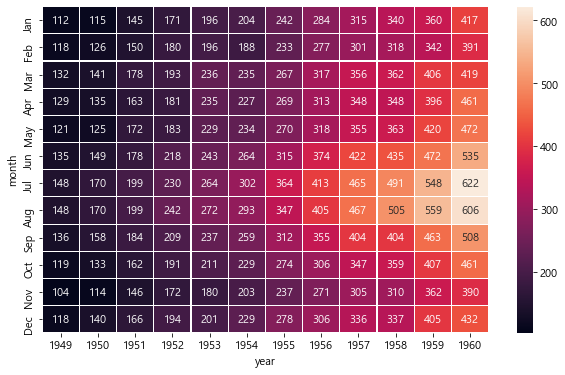

In [109]:
# annot=True 값, 구분선 표시
#fmt='d' -> 정수로 표시

#sns.heatmap(flights_pv);
sns.heatmap(flights_pv, annot=True, fmt='d', linewidths=.1)

<AxesSubplot:xlabel='year', ylabel='month'>

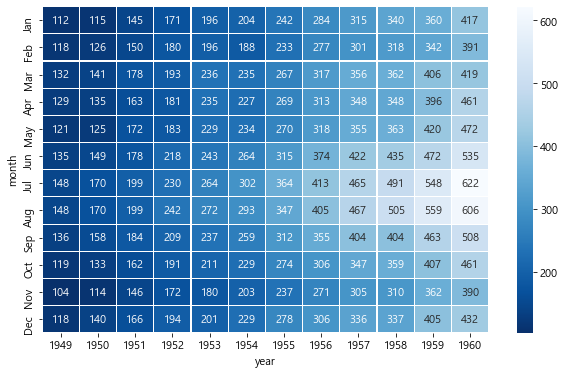

In [111]:
sns.heatmap(flights_pv, annot=True, fmt='d', linewidths=.1, cmap='Blues_r')

ValueError: Unknown format code 'd' for object of type 'float'

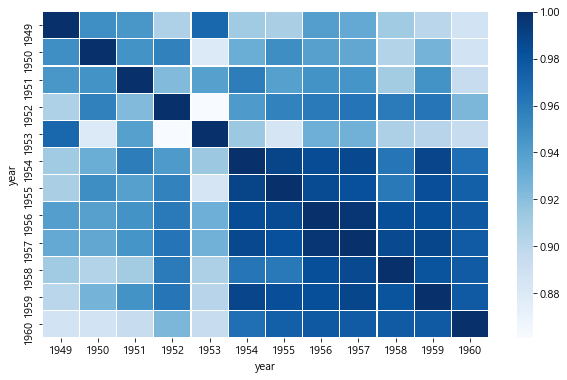

In [113]:
sns.heatmap(flights_pv.corr(), annot=True, fmt='d', linewidths=.1, cmap='Blues');

In [115]:
tips.columns

Index(['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size'], dtype='object')

In [116]:
tips[['total_bill', 'tip']].corr

,total_bill,tip
0,16.99,1.01
1,10.34,1.66
2,21.01,3.50
3,23.68,3.31
4,24.59,3.61
...,...,...
239,29.03,5.92
240,27.18,2.00
241,22.67,2.00
242,17.82,1.75


<AxesSubplot:>

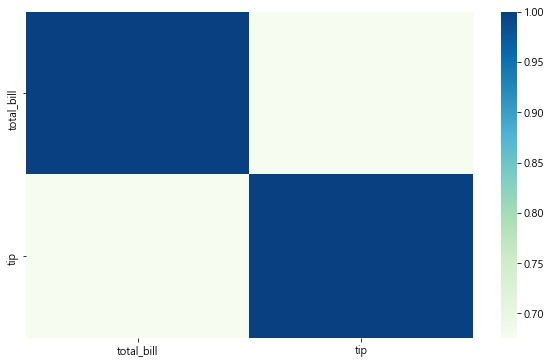

In [118]:
sns.heatmap(tips[['total_bill', 'tip']].corr(), cmap='GnBu')

In [ ]:
sns.heatmap(flights_pv, annot=True, fmt='d', linewidths=.1, 
            cmap='BuPu'
           )

### 그래프 스타일 지정

darkgrid, whitegrid, dark, white, ticks

sns.set_style(styleName)

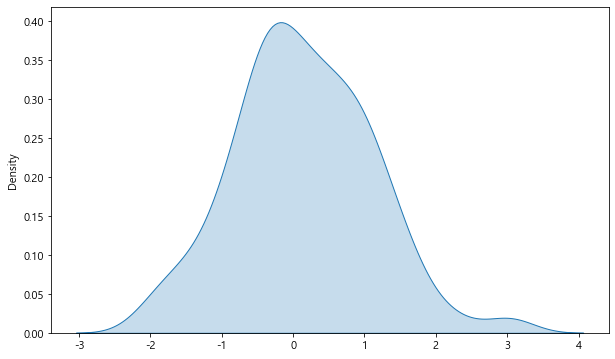

In [119]:
# shade=True
data = np.random.randn(200)
sns.kdeplot(data, shade=True);

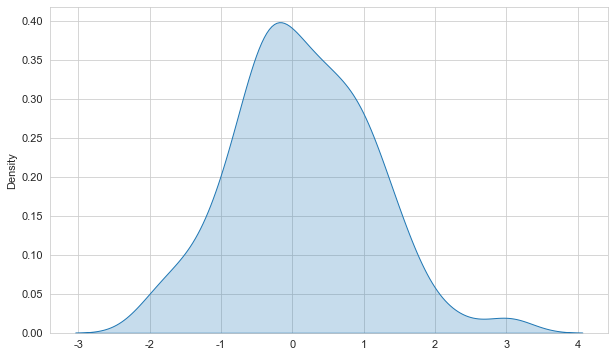

In [120]:
sns.set_style('whitegrid')
sns.kdeplot(data, shade=True);

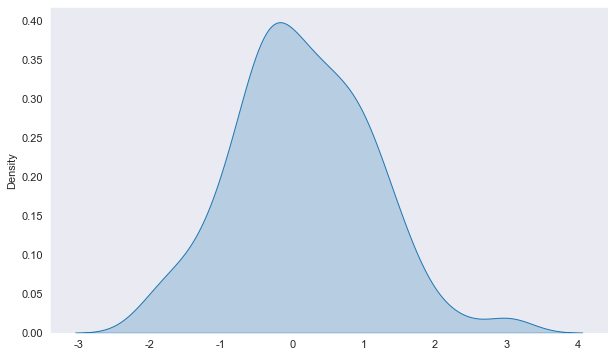

In [121]:
sns.set_style('dark')
sns.kdeplot(data, shade=True);

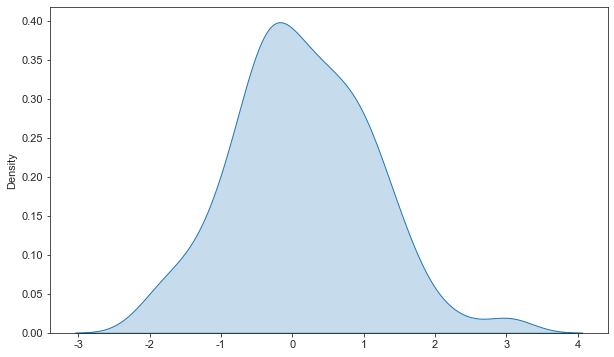

In [122]:
sns.set_style('ticks')
sns.kdeplot(data, shade=True);

In [123]:
pip list

Package                            Version
---------------------------------- -------------------
alabaster                          0.7.12
altgraph                           0.17.2
anaconda-client                    1.7.2
anaconda-navigator                 2.0.3
anaconda-project                   0.9.1
anyio                              2.2.0
appdirs                            1.4.4
argh                               0.26.2
argon2-cffi                        20.1.0
asn1crypto                         1.4.0
astroid                            2.5
astropy                            4.2.1
async-generator                    1.10
atomicwrites                       1.4.0
attrs                              20.3.0
autopep8                           1.5.6
Babel                              2.9.0
backcall                           0.2.0
backports.functools-lru-cache      1.6.4
backports.shutil-get-terminal-size 1.0.0
backports.tempfile                 1.0
backports.weakref                  1.0.po